# Exercise 1 

In this exercise, we will practice how to apply principal component analysis (`PCA`) and `k-means` on the `digits` dataset from `sklearn`.

### Exercise 1(a) (5 points)

Load the below libraries and the `digits` dataset.

```
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X, y = digits['data'], digits['target']
```

In [14]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X, y = digits['data'], digits['target']

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
X.max()

16.0

In [7]:
X.mean(axis=1).shape

(1797,)

### Exercise 1(b) (2 points)

Normalize the input data by dividing by the maximum values of `X`.

In [11]:
X = X / X.max()
X = X - X.mean(axis=0)
X

array([[-6.27276009e-15, -2.73339539e-02, -1.84228847e-02, ...,
        -6.08505878e-01, -1.86031085e-01, -3.27907322e-02],
       [-6.27276009e-15, -2.73339539e-02, -4.68231631e-01, ...,
         2.91111615e-01, -1.86031085e-01, -3.27907322e-02],
       [-6.27276009e-15, -2.73339539e-02, -4.68231631e-01, ...,
         8.30882111e-01,  6.23624659e-01, -3.27907322e-02],
       ...,
       [-6.27276009e-15, -2.73339539e-02, -3.78269882e-01, ...,
        -6.87353822e-02, -1.86031085e-01, -3.27907322e-02],
       [-6.27276009e-15, -2.73339539e-02, -2.88308133e-01, ...,
         4.71035114e-01, -1.86031085e-01, -3.27907322e-02],
       [-6.27276009e-15, -2.73339539e-02,  4.31385862e-01, ...,
         4.71035114e-01, -9.60693361e-02, -3.27907322e-02]])

### Exercise 1(c) (6 points)

Compute the principal component of `X` and visualize the explanied variance ratio.

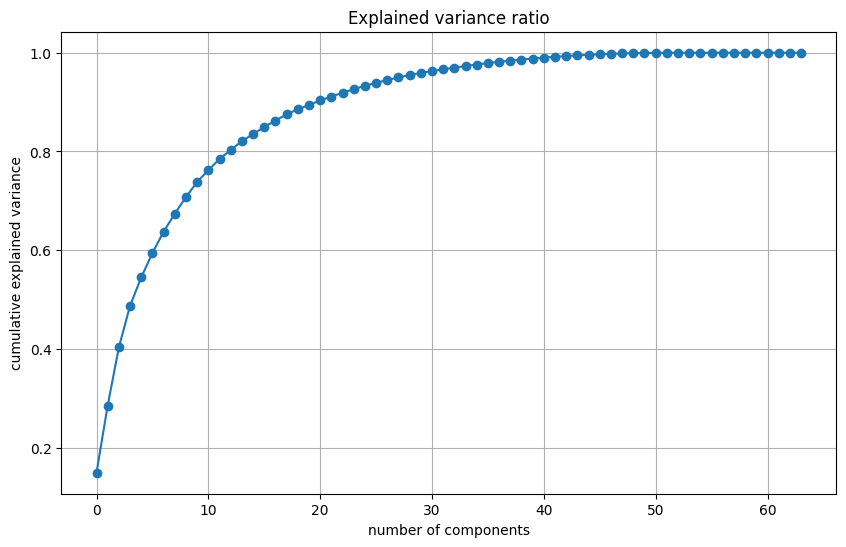

In [15]:
# define the PCA object
pca_md = PCA()
X_pca = pca_md.fit(X)

#plot the explained variance ratio
plt.figure(figsize=(10, 6))

plt.plot(np.cumsum(pca_md.explained_variance_ratio_), '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance ratio')
plt.grid()
plt.show();

From the above chart, we see that the first 40 principal component explained almost 100% of the variability in the data

### Exercise 1(d) (6 points)

Based on the plot from part 1(c), compute the principal components. Visualize the first two components.

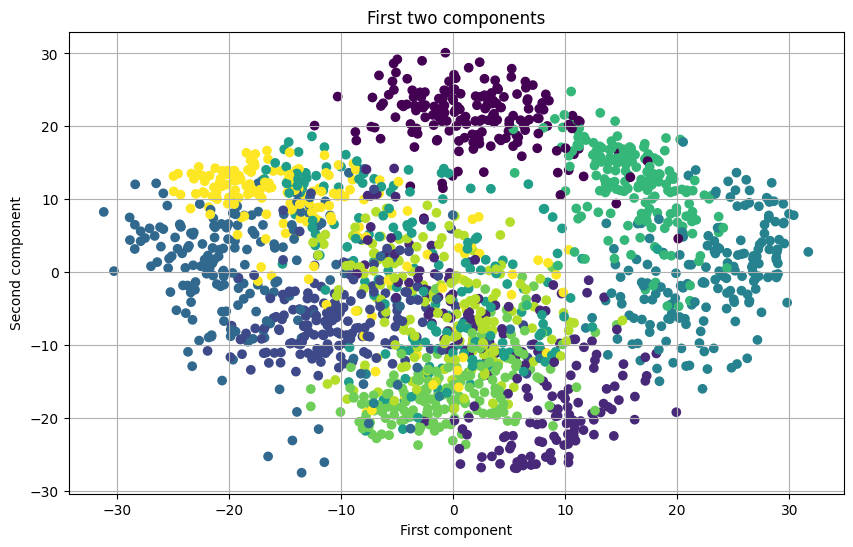

In [16]:
# compute the number of components that explain 99% of the variance
components = PCA(n_components=40).fit_transform(X)

# Visualize the first two components
plt.figure(figsize=(10, 6))

plt.scatter(components[:, 0], components[:, 1], c=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('First two components')
plt.grid()
plt.show();

### Exercise 1(e) (8 points)

Estimate the number of clusters. based on the components, using the `inertia` and the `silhoutte` score.

In [17]:
# defining the list to store the innertia and sillhouette scores
inertia, silhouette = [], []

#loop over the number of clusters
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(components)
    
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(components, kmeans.labels_))

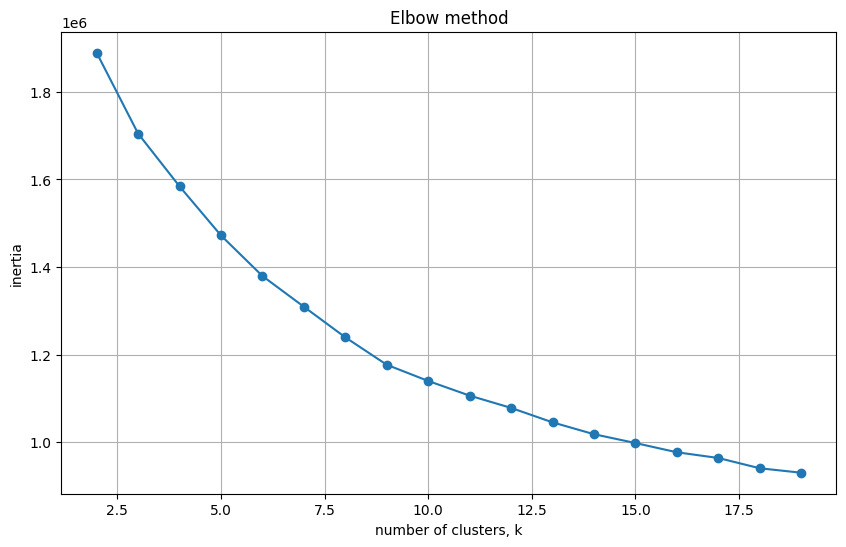

In [ ]:
#visualize the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.grid()
plt.show();

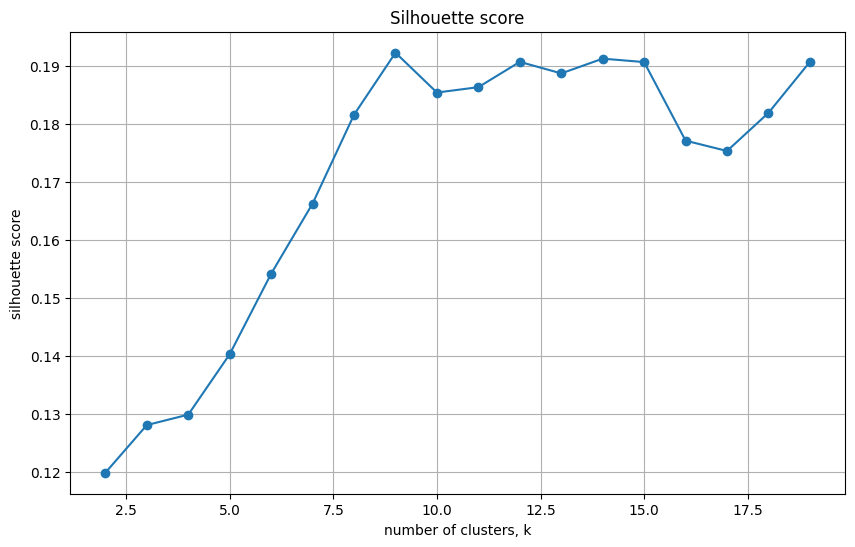

In [19]:
# visualize the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.title('Silhouette score')
plt.grid()
plt.show();